#                                    APRENTISSAGE SEMI-SUPERVISE 
###                                               (DATASET DE CLASSIFICATION : FETAL_HEALTH DE KAGGLE)

### LAB (10%), non-LAB (80%), TEST (10%)

In [197]:
#Bibliothèques
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd
#from sklearn.metrics import zero_one_loss, accuracy_score,precision_score, recall_score, f1_score
from sklearn import preprocessing
import numpy as np
from sklearn.impute import SimpleImputer

# 1 - Téléchargement et traitement du dataset fetal_health 
data = pd.read_csv('fetal_health.csv')
data.shape
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(data)
data=imp.transform(data) 
NB_FEATURES=21
X=data[:,0:NB_FEATURES]         # Features: inputs (21 premières colonnes)
y=data[:,NB_FEATURES:].ravel()  # Target : output/ (Dernière colonne)


# 2 - Préparation du dataset semi-supervisé
# Découpage Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1, stratify=y)
# Découpage LAB/non-LAB 
X_train_lab, X_train_unlab, y_train_lab, y_train_unlab = train_test_split(X_train, y_train, test_size=0.80, random_state=1, stratify=y_train)
#Ensemble de trainig 90% (10% LAB/ 80% non-LAB)
print("_________________________________________________")
print("LAB (10%), non-LAB (80%), TEST (10%)  : ")
print("                                                 ")
print('-LAB :', X_train_lab.shape)
print('-non_LAB:', X_train_unlab.shape)
#Ensemble de test 10%
print('-TEST :', X_test.shape)


# 3 - Normalisation
#scaler=preprocessing.StandardScaler().fit(X_train)
#X_train=scaler.transform(X_train)
#X_test=scaler.transform(X_test)

# Définition d'un modele MLP (avec paramètres par défaut car il a donné déja de bons résultats)
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',  solver='adam',
                   alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001,
                   power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False,
                   warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False,
                   validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, 
                   )


# Entrainement du modele sur le dataset labelisé
mlp.fit(X_train_lab, y_train_lab)


#Self Trainig
mlp.predict_proba(X_test[:])
mlp.predict(X_test[:, :])

#Métrique 
print("_________________________________________________")
print("Score de prédiction : ",mlp.score(X_test, y_test))

_________________________________________________
LAB (10%), non-LAB (80%), TEST (10%)  : 
                                                 
-LAB : (382, 21)
-non_LAB: (1531, 21)
-TEST : (213, 21)
_________________________________________________
Score de prédiction :  0.88


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### LAB (20%), non-LAB (70%), TEST (10%)

In [141]:
#Bibliothèques
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd
#from sklearn.metrics import zero_one_loss, accuracy_score,precision_score, recall_score, f1_score
from sklearn import preprocessing
import numpy as np
from sklearn.impute import SimpleImputer

# 1 - Téléchargement et traitement du dataset fetal_health 
data = pd.read_csv('fetal_health.csv')
data.shape
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(data)
data=imp.transform(data) 
NB_FEATURES=21
X=data[:,0:NB_FEATURES]         # Features: inputs (21 premières colonnes)
y=data[:,NB_FEATURES:].ravel()  # Target : output/ (Dernière colonne)

# 2 - Préparation du dataset semi-supervisé
# Découpage Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1, stratify=y)
# Découpage LAB/non-LAB 
X_train_lab, X_train_unlab, y_train_lab, y_train_unlab = train_test_split(X_train, y_train, test_size=0.7, random_state=1, stratify=y_train)
#Ensemble de trainig 90% (20% LAB/ 70% non-LAB)
print("_________________________________________________")
print("LAB (20%), non-LAB (70%), TEST (10%)  : ")
print("                                                 ")
print('-LAB :', X_train_lab.shape)
print('-non_LAB:', X_train_unlab.shape)
#Ensemble de test 10%
print('-TEST :', X_test.shape)


# 3 - Normalisation
#scaler=preprocessing.StandardScaler().fit(X_train)
#X_train=scaler.transform(X_train)
#X_test=scaler.transform(X_test)

# Définition d'un modele MLP (avec paramètres par défaut car il a donné déja de bons résultats)
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',  solver='adam',
                   alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001,
                   power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False,
                   warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False,
                   validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, 
                   )


# Entrainement du modele sur le dataset labelisé
mlp.fit(X_train_lab, y_train_lab)


#Self Trainig
mlp.predict_proba(X_test[:])
mlp.predict(X_test[:, :])

#Métrique 
print("_________________________________________________")
print("Score de prédiction : ",mlp.score(X_test, y_test))

_________________________________________________
LAB (20%), non-LAB (70%), TEST (10%)  : 
                                                 
-LAB : (573, 21)
-non_LAB: (1340, 21)
-TEST : (213, 21)
_________________________________________________
Score de prédiction :  0.863849765258216


### LAB (30%), non-LAB (60%), TEST (10%)

In [145]:
#Bibliothèques
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd
#from sklearn.metrics import zero_one_loss, accuracy_score,precision_score, recall_score, f1_score
from sklearn import preprocessing
import numpy as np
from sklearn.impute import SimpleImputer

# 1 - Téléchargement et traitement du dataset fetal_health 
data = pd.read_csv('fetal_health.csv')
data.shape
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(data)
data=imp.transform(data) 
NB_FEATURES=21
X=data[:,0:NB_FEATURES]         # Features: inputs (21 premières colonnes)
y=data[:,NB_FEATURES:].ravel()  # Target : output/ (Dernière colonne)

# 2 - Préparation du dataset semi-supervisé
# Découpage Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1, stratify=y)
# Découpage LAB/non-LAB 
X_train_lab, X_train_unlab, y_train_lab, y_train_unlab = train_test_split(X_train, y_train, test_size=0.60, random_state=1, stratify=y_train)
#Ensemble de trainig 90% (30% LAB/ 60% non-LAB)
print("_________________________________________________")
print("LAB (30%), non-LAB (60%), TEST (10%)  : ")
print("                                                 ")
print('-LAB :', X_train_lab.shape)
print('-non_LAB:', X_train_unlab.shape)
#Ensemble de test 10%
print('-TEST :', X_test.shape)


# 3 - Normalisation
#scaler=preprocessing.StandardScaler().fit(X_train)
#X_train=scaler.transform(X_train)
#X_test=scaler.transform(X_test)

# Définition d'un modele MLP (avec paramètres par défaut car il a donné déja de bons résultats)
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',  solver='adam',
                   alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001,
                   power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False,
                   warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False,
                   validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, 
                   )


# Entrainement du modele sur le dataset labelisé
mlp.fit(X_train_lab, y_train_lab)


#Self Trainig
mlp.predict_proba(X_test[:])
mlp.predict(X_test[:, :])

#Métrique 
print("_________________________________________________")
print("Score de prédiction : ",mlp.score(X_test, y_test))

_________________________________________________
LAB (30%), non-LAB (60%), TEST (10%)  : 
                                                 
-LAB : (765, 21)
-non_LAB: (1148, 21)
-TEST : (213, 21)
_________________________________________________
Score de prédiction :  0.863849765258216


### LAB (40%), non-LAB (50%), TEST (10%)

In [148]:
#Bibliothèques
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd
#from sklearn.metrics import zero_one_loss, accuracy_score,precision_score, recall_score, f1_score
from sklearn import preprocessing
import numpy as np
from sklearn.impute import SimpleImputer

# 1 - Téléchargement et traitement du dataset fetal_health 
data = pd.read_csv('fetal_health.csv')
data.shape
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(data)
data=imp.transform(data) 
NB_FEATURES=21
X=data[:,0:NB_FEATURES]         # Features: inputs (21 premières colonnes)
y=data[:,NB_FEATURES:].ravel()  # Target : output/ (Dernière colonne)

# 2 - Préparation du dataset semi-supervisé
# Découpage Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1, stratify=y)
# Découpage LAB/non-LAB 
X_train_lab, X_train_unlab, y_train_lab, y_train_unlab = train_test_split(X_train, y_train, test_size=0.50, random_state=1, stratify=y_train)
#Ensemble de trainig 90% (40% LAB/ 50% non-LAB)
print("_________________________________________________")
print("LAB (40%), non-LAB (50%), TEST (10%)  : ")
print("                                                 ")
print('-LAB :', X_train_lab.shape)
print('-non_LAB:', X_train_unlab.shape)
#Ensemble de test 10%
print('-TEST :', X_test.shape)


# 3 - Normalisation
#scaler=preprocessing.StandardScaler().fit(X_train)
#X_train=scaler.transform(X_train)
#X_test=scaler.transform(X_test)

# Définition d'un modele MLP (avec paramètres par défaut car il a donné déja de bons résultats)
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',  solver='adam',
                   alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001,
                   power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False,
                   warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False,
                   validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, 
                   )


# Entrainement du modele sur le dataset labelisé
mlp.fit(X_train_lab, y_train_lab)


#Self Trainig
mlp.predict_proba(X_test[:])
mlp.predict(X_test[:, :])

#Métrique
print("_________________________________________________")
print("Score de prédiction : ",mlp.score(X_test, y_test))

_________________________________________________
LAB (40%), non-LAB (50%), TEST (10%)  : 
                                                 
-LAB : (956, 21)
-non_LAB: (957, 21)
-TEST : (213, 21)
_________________________________________________
Score de prédiction :  0.8544600938967136


### LAB (50%), non-LAB (40%), TEST (10%)

In [153]:
#Bibliothèques
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd
#from sklearn.metrics import zero_one_loss, accuracy_score,precision_score, recall_score, f1_score
from sklearn import preprocessing
import numpy as np
from sklearn.impute import SimpleImputer

# 1 - Téléchargement et traitement du dataset fetal_health 
data = pd.read_csv('fetal_health.csv')
data.shape
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(data)
data=imp.transform(data) 
NB_FEATURES=21
X=data[:,0:NB_FEATURES]         # Features: inputs (21 premières colonnes)
y=data[:,NB_FEATURES:].ravel()  # Target : output/ (Dernière colonne)

# 2 - Préparation du dataset semi-supervisé
# Découpage Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1, stratify=y)
# Découpage LAB/non-LAB 
X_train_lab, X_train_unlab, y_train_lab, y_train_unlab = train_test_split(X_train, y_train, test_size=0.40, random_state=1, stratify=y_train)
#Ensemble de trainig 90% (50% LAB/ 40% non-LAB)
print("_________________________________________________")
print("LAB (50%), non-LAB (40%), TEST (10%)  : ")
print("                                                 ")
print('-LAB :', X_train_lab.shape)
print('-non_LAB:', X_train_unlab.shape)
#Ensemble de test 10%
print('-TEST :', X_test.shape)


# 3 - Normalisation
#scaler=preprocessing.StandardScaler().fit(X_train)
#X_train=scaler.transform(X_train)
#X_test=scaler.transform(X_test)

# Définition d'un modele MLP (avec paramètres par défaut car il a donné déja de bons résultats)
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',  solver='adam',
                   alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001,
                   power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False,
                   warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False,
                   validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, 
                   )


# Entrainement du modele sur le dataset labelisé
mlp.fit(X_train_lab, y_train_lab)


#Self Trainig
mlp.predict_proba(X_test[:])
mlp.predict(X_test[:, :])

#Métrique
print("_________________________________________________")
print("Score de prédiction : ",mlp.score(X_test, y_test))

_________________________________________________
LAB (50%), non-LAB (40%), TEST (10%)  : 
                                                 
-LAB : (1147, 21)
-non_LAB: (766, 21)
-TEST : (213, 21)
_________________________________________________
Score de prédiction :  0.8544600938967136


### LAB (60%), non-LAB (30%), TEST (10%)

In [172]:
#Bibliothèques
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd
#from sklearn.metrics import zero_one_loss, accuracy_score,precision_score, recall_score, f1_score
from sklearn import preprocessing
import numpy as np
from sklearn.impute import SimpleImputer

# 1 - Téléchargement et traitement du dataset fetal_health 
data = pd.read_csv('fetal_health.csv')
data.shape
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(data)
data=imp.transform(data) 
NB_FEATURES=21
X=data[:,0:NB_FEATURES]         # Features: inputs (21 premières colonnes)
y=data[:,NB_FEATURES:].ravel()  # Target : output/ (Dernière colonne)

# 2 - Préparation du dataset semi-supervisé
# Découpage Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1, stratify=y)
# Découpage LAB/non-LAB 
X_train_lab, X_train_unlab, y_train_lab, y_train_unlab = train_test_split(X_train, y_train, test_size=0.30, random_state=1, stratify=y_train)
#Ensemble de trainig 90% (60% LAB/ 30% non-LAB)
print("_________________________________________________")
print("LAB (60%), non-LAB (30%), TEST (10%)  : ")
print("                                                 ")
print('-LAB :', X_train_lab.shape)
print('-non_LAB:', X_train_unlab.shape)
#Ensemble de test 10%
print('-TEST :', X_test.shape)


# 3 - Normalisation
#scaler=preprocessing.StandardScaler().fit(X_train)
#X_train=scaler.transform(X_train)
#X_test=scaler.transform(X_test)

# Définition d'un modele MLP (avec paramètres par défaut car il a donné déja de bons résultats)
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',  solver='adam',
                   alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001,
                   power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False,
                   warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False,
                   validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, 
                   )


# Entrainement du modele sur le dataset labelisé
mlp.fit(X_train_lab, y_train_lab)


#Self Trainig
mlp.predict_proba(X_test[:])
mlp.predict(X_test[:, :])

#Métrique
print("_________________________________________________")
print("Score de prédiction : ",mlp.score(X_test, y_test))

_________________________________________________
LAB (60%), non-LAB (30%), TEST (10%)  : 
                                                 
-LAB : (1339, 21)
-non_LAB: (574, 21)
-TEST : (213, 21)
_________________________________________________
Score de prédiction :  0.8591549295774648


### LAB (70%), non-LAB (20%), TEST (10%)

In [184]:
#Bibliothèques
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd
#from sklearn.metrics import zero_one_loss, accuracy_score,precision_score, recall_score, f1_score
from sklearn import preprocessing
import numpy as np
from sklearn.impute import SimpleImputer

# 1 - Téléchargement et traitement du dataset fetal_health 
data = pd.read_csv('fetal_health.csv')
data.shape
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(data)
data=imp.transform(data) 
NB_FEATURES=21
X=data[:,0:NB_FEATURES]         # Features: inputs (21 premières colonnes)
y=data[:,NB_FEATURES:].ravel()  # Target : output/ (Dernière colonne)


# 2 - Préparation du dataset semi-supervisé
# Découpage Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1, stratify=y)
# Découpage LAB/non-LAB 
X_train_lab, X_train_unlab, y_train_lab, y_train_unlab = train_test_split(X_train, y_train, test_size=0.20, random_state=1, stratify=y_train)
#Ensemble de trainig 90% (70% LAB/ 20% non-LAB)
print("_________________________________________________")
print("LAB (70%), non-LAB (20%), TEST (10%)  : ")
print("                                                 ")
print('-LAB :', X_train_lab.shape)
print('-non_LAB:', X_train_unlab.shape)
#Ensemble de test 10%
print('-TEST :', X_test.shape)


# 3 - Normalisation
#scaler=preprocessing.StandardScaler().fit(X_train)
#X_train=scaler.transform(X_train)
#X_test=scaler.transform(X_test)

# Définition d'un modele MLP (avec paramètres par défaut car il a donné déja de bons résultats)
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',  solver='adam',
                   alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001,
                   power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False,
                   warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False,
                   validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, 
                   )


# Entrainement du modele sur le dataset labelisé
mlp.fit(X_train_lab, y_train_lab)


#Self Trainig
mlp.predict_proba(X_test[:])
mlp.predict(X_test[:, :])

#Métrique
print("_________________________________________________")
print("Score de prédiction : ",mlp.score(X_test, y_test))

_________________________________________________
LAB (70%), non-LAB (20%), TEST (10%)  : 
                                                 
-LAB : (1530, 21)
-non_LAB: (383, 21)
-TEST : (213, 21)
_________________________________________________
Score de prédiction :  0.8544600938967136


### LAB (80%), non-LAB (10%), TEST (10%)

In [187]:
#Bibliothèques
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd
#from sklearn.metrics import zero_one_loss, accuracy_score,precision_score, recall_score, f1_score
from sklearn import preprocessing
import numpy as np
from sklearn.impute import SimpleImputer

# 1 - Téléchargement et traitement du dataset fetal_health 
data = pd.read_csv('fetal_health.csv')
data.shape
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(data)
data=imp.transform(data) 
NB_FEATURES=21
X=data[:,0:NB_FEATURES]         # Features: inputs (21 premières colonnes)
y=data[:,NB_FEATURES:].ravel()  # Target : output/ (Dernière colonne)


# 2 - Préparation du dataset semi-supervisé
# Découpage Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1, stratify=y)
# Découpage LAB/non-LAB
X_train_lab, X_train_unlab, y_train_lab, y_train_unlab = train_test_split(X_train, y_train, test_size=0.10, random_state=1, stratify=y_train)
#Ensemble de trainig 90% (80% LAB/ 10% non-LAB)
print("_________________________________________________")
print("LAB (80%), non-LAB (10%), TEST (10%)  : ")
print("                                                 ")
print('-LAB :', X_train_lab.shape)
print('-non_LAB:', X_train_unlab.shape)
#Ensemble de test 10%
print('-TEST :', X_test.shape)


# 3 - Normalisation
#scaler=preprocessing.StandardScaler().fit(X_train)
#X_train=scaler.transform(X_train)
#X_test=scaler.transform(X_test)

# Définition d'un modele MLP (avec paramètres par défaut car il a donné déja de bons résultats)
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',  solver='adam',
                   alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001,
                   power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False,
                   warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False,
                   validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, 
                   )


# Entrainement du modele sur le dataset labelisé
mlp.fit(X_train_lab, y_train_lab)


#Self Trainig
mlp.predict_proba(X_test[:])
mlp.predict(X_test[:, :])

#Métrique
print("_________________________________________________")
print("Score de prédiction : ",mlp.score(X_test, y_test))

_________________________________________________
LAB (80%), non-LAB (10%), TEST (10%)  : 
                                                 
-LAB : (1721, 21)
-non_LAB: (192, 21)
-TEST : (213, 21)
_________________________________________________
Score de prédiction :  0.8544600938967136


### variation de la métrique (score de prédiction) en fonction des proportions LAB/non-LAB 
#### PS : résultats copiés de l'Excel


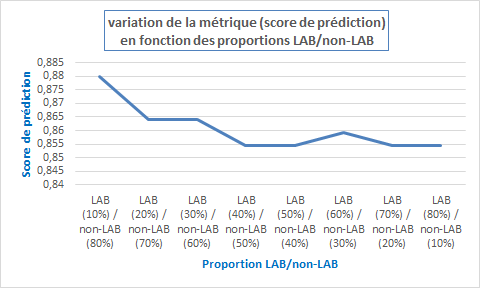

	LAB (10%) / non-LAB (80%)	LAB (20%) / non-LAB (70%)	LAB (30%) / non-LAB (60%)	LAB (40%) / non-LAB (50%)	LAB (50%) / non-LAB (40%)	LAB (60%) / non-LAB (30%)	LAB (70%) / non-LAB (20%)	LAB (80%) / non-LAB (10%)
Score de prédiction	0,88	0,863849765	0,863849765	0,854460094	0,854460094	0,85915493	0,854460094	0,854460094
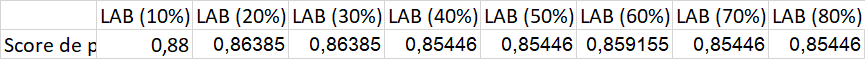

# LAB (90%), non-LAB (0%), TEST (10%)
##### Il s'agit de l'apprentissage supervisé (étape 2).

# LAB (0%), non-LAB (90%), TEST (10%)
##### Il s'agit de l'apprentissage non-supervisé (Machines Boltzmann restreintes)